EDA Notebook 

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the filtered data
data_path = os.path.join('.', 'columbia_filtered_citibike.csv')
df = pd.read_csv(data_path, parse_dates=['started_at', 'ended_at'])

print(f"Loaded DataFrame shape: {df.shape}")
print(f"Total rows: {df.shape[0]:,}")
print(f"Total columns: {df.shape[1]}")

/var/folders/mp/krm2l_md3rg7ymrqgfg4stsr0000gn/T/ipykernel_10878/2503140243.py:3: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, parse_dates=['started_at', 'ended_at'])


Loaded DataFrame shape: (529908, 13)
Total rows: 529,908
Total columns: 13


In [3]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [4]:
df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,DF041079291BCB57,classic_bike,2024-01-01 00:05:39.030,2024-01-01 00:29:03.147,W 116 St & Amsterdam Ave,7692.11,W 116 St & Amsterdam Ave,7692.11,40.806758,-73.960708,40.806758,-73.960708,casual
1,ECC36795CBE519C0,electric_bike,2024-01-01 00:12:53.593,2024-01-01 00:44:46.877,W 45 St & 8 Ave,6676.02,W 113 St & Broadway,7713.01,40.759291,-73.988597,40.805973,-73.964928,casual
2,09AEBF4510BFBE52,electric_bike,2024-01-01 00:13:21.695,2024-01-01 00:45:09.962,W 45 St & 8 Ave,6676.02,W 113 St & Broadway,7713.01,40.759291,-73.988597,40.805973,-73.964928,casual
3,79C06624CD5FDD91,electric_bike,2024-01-01 00:13:27.263,2024-01-01 00:44:31.619,W 45 St & 8 Ave,6676.02,W 113 St & Broadway,7713.01,40.759291,-73.988597,40.805973,-73.964928,casual
4,E4C6AAB102A0EFD9,electric_bike,2024-01-01 00:13:30.398,2024-01-01 00:44:39.129,W 45 St & 8 Ave,6676.02,W 113 St & Broadway,7713.01,40.759291,-73.988597,40.805973,-73.964928,casual
5,A0B8F0DEB214CBBE,electric_bike,2024-01-01 00:13:59.871,2024-01-01 00:44:56.412,W 45 St & 8 Ave,6676.02,W 113 St & Broadway,7713.01,40.759291,-73.988597,40.805973,-73.964928,casual
6,167C2AFE19E42E4D,electric_bike,2024-01-01 00:19:26.001,2024-01-01 00:26:03.535,Lenox Ave & W 126 St,7720.03,W 120 St & Claremont Ave,7745.07,40.808442,-73.945209,40.810949,-73.963400,member
7,3572EA2A5901CFEE,electric_bike,2024-01-01 00:27:28.723,2024-01-01 00:37:54.741,W 120 St & Claremont Ave,7745.07,1 Ave & E 110 St,7522.02,40.810949,-73.963400,40.792327,-73.938300,casual
8,348F0FF5E539F030,electric_bike,2024-01-01 00:38:59.943,2024-01-01 00:42:24.390,Morningside Dr & Amsterdam Ave,7741.04,W 120 St & Claremont Ave,7745.07,40.810285,-73.957365,40.810949,-73.963400,member
9,F14AA5C4F9C739C8,electric_bike,2024-01-01 00:45:18.310,2024-01-01 00:50:53.857,W 106 St & Amsterdam Ave,7634.01,W 120 St & Claremont Ave,7745.07,40.800836,-73.966449,40.810949,-73.963400,member


In [5]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

Lets drop columns that are not gonna be used into the analysis

In [6]:
df_feat = df.copy()

# keeping only relevant columns
df_feat = df_feat[[
    "started_at",
    "ended_at",
    "start_station_name",
    "end_station_name"
]]

Split outflow/inflow

In [7]:
outflow_df = df_feat[["start_station_name", "started_at"]].copy()
outflow_df.rename(columns={
    "start_station_name": "station",
    "started_at": "timestamp"
}, inplace=True)
outflow_df["flow_type"] = "outflow"

In [8]:
outflow_df.head(5)

,station,timestamp,flow_type
0,W 116 St & Amsterdam Ave,2024-01-01 00:05:39.030,outflow
1,W 45 St & 8 Ave,2024-01-01 00:12:53.593,outflow
2,W 45 St & 8 Ave,2024-01-01 00:13:21.695,outflow
3,W 45 St & 8 Ave,2024-01-01 00:13:27.263,outflow
4,W 45 St & 8 Ave,2024-01-01 00:13:30.398,outflow


In [9]:
inflow_df = df_feat[["end_station_name", "ended_at"]].copy()
inflow_df.rename(columns={
    "end_station_name": "station",
    "ended_at": "timestamp"
}, inplace=True)
inflow_df["flow_type"] = "inflow"

inflow_df.head(5)

,station,timestamp,flow_type
0,W 116 St & Amsterdam Ave,2024-01-01 00:29:03.147,inflow
1,W 113 St & Broadway,2024-01-01 00:44:46.877,inflow
2,W 113 St & Broadway,2024-01-01 00:45:09.962,inflow
3,W 113 St & Broadway,2024-01-01 00:44:31.619,inflow
4,W 113 St & Broadway,2024-01-01 00:44:39.129,inflow


Lets keep only the 7 stations we care about

In [10]:
columbia_stations = [
    "W 116 St & Amsterdam Ave",
    "W 113 St & Broadway",
    "W 116 St & Broadway",
    "Amsterdam Ave & W 119 St",
    "Broadway & W 122 St",
    "Morningside Dr & Amsterdam Ave",
    "W 120 St & Claremont Ave"
]

In [11]:
outflow_df = outflow_df[outflow_df["station"].isin(columbia_stations)].copy()
inflow_df  = inflow_df[inflow_df["station"].isin(columbia_stations)].copy()

In [12]:
print(len(outflow_df["station"].unique()))
print(len(inflow_df["station"].unique()))

7
7


Lets extract timestamps for aggregation

In [13]:
outflow_df["timestamp"] = pd.to_datetime(outflow_df["timestamp"])
inflow_df["timestamp"]  = pd.to_datetime(inflow_df["timestamp"])

In [14]:
#Extracting corect timestamp to do the groupby functions / we dont care about minutes and secs
for df_event in [outflow_df, inflow_df]:
    df_event["hour"] = df_event["timestamp"].dt.floor("h")

In [15]:
#We dont need the detailed timestamp anymore
outflow_df = outflow_df.drop(columns=["timestamp"])
inflow_df  = inflow_df.drop(columns=["timestamp"])


In [16]:
#Lets aggregate for the same day for each station the number of bikes leaving the station per hour
outflow_hourly = (
    outflow_df
    .groupby(["station", "hour"])
    .size()
    .reset_index(name="outflow")
)

In [17]:
outflow_hourly

,station,hour,outflow
0,Amsterdam Ave & W 119 St,2024-01-01 23:00:00,1
1,Amsterdam Ave & W 119 St,2024-01-02 10:00:00,1
2,Amsterdam Ave & W 119 St,2024-01-02 19:00:00,1
3,Amsterdam Ave & W 119 St,2024-01-03 21:00:00,1
4,Amsterdam Ave & W 119 St,2024-01-04 12:00:00,1
...,...,...,...
73816,W 120 St & Claremont Ave,2025-10-31 19:00:00,3
73817,W 120 St & Claremont Ave,2025-10-31 20:00:00,1
73818,W 120 St & Claremont Ave,2025-10-31 21:00:00,2
73819,W 120 St & Claremont Ave,2025-10-31 22:00:00,1


In [18]:
#Same for inflow
inflow_hourly = (
    inflow_df
    .groupby(["station", "hour"])
    .size()
    .reset_index(name="inflow")
)

In [19]:
#Now we need to merge the two dfs, we will use an outer join to keep all the timestamps 
# #that exist in each df
hourly_df = pd.merge(
    outflow_hourly,
    inflow_hourly,
    on=["station", "hour"],
    how="outer"
)

#Then we can fill with 0s the nans because it means that there was no inflow if there was an outflow 
hourly_df["inflow"] = hourly_df["inflow"].fillna(0)
hourly_df["outflow"] = hourly_df["outflow"].fillna(0)

In [20]:
hourly_df

,station,hour,outflow,inflow
0,Amsterdam Ave & W 119 St,2024-01-01 19:00:00,0.0,1.0
1,Amsterdam Ave & W 119 St,2024-01-01 23:00:00,1.0,0.0
2,Amsterdam Ave & W 119 St,2024-01-02 10:00:00,1.0,1.0
3,Amsterdam Ave & W 119 St,2024-01-02 14:00:00,0.0,1.0
4,Amsterdam Ave & W 119 St,2024-01-02 19:00:00,1.0,0.0
...,...,...,...,...
86085,W 120 St & Claremont Ave,2025-10-31 19:00:00,3.0,0.0
86086,W 120 St & Claremont Ave,2025-10-31 20:00:00,1.0,0.0
86087,W 120 St & Claremont Ave,2025-10-31 21:00:00,2.0,0.0
86088,W 120 St & Claremont Ave,2025-10-31 22:00:00,1.0,0.0


In [21]:
#Sanity check
stations = hourly_df["station"].unique()
print(stations)

['Amsterdam Ave & W 119 St' 'Broadway & W 122 St'
 'Morningside Dr & Amsterdam Ave' 'W 113 St & Broadway'
 'W 116 St & Amsterdam Ave' 'W 116 St & Broadway'
 'W 120 St & Claremont Ave']


In [22]:
#So for hour timestamps skipped e.g after  2024-01-01 19:00 we go to 23:00 which
# just means that there were no rides in that hour (neither leaving neither parking) so we can fill
#the timeseries with 0s

#Lets build the full timeline of dates
full_hours = pd.date_range(
    start=hourly_df["hour"].min(),
    end=hourly_df["hour"].max(),
    freq="h"
)

#here we create a Cartesian product : (stations, hour)
#We Take: all 7 Columbia stations
# every hour in the timeline
# and generate a row for every combination

full_index = pd.MultiIndex.from_product(
    [stations, full_hours],
    names=["station", "hour"]
)

#Then we Temporarily use (station, hour) as the index
#Align current data with the full_index
#Any missing (station, hour) combo becomes a new row with NaN
#Reset back to normal columns
hourly_df = (
    hourly_df
    .set_index(["station", "hour"])
    .reindex(full_index)
    .reset_index()
)
#
hourly_df["inflow"] = hourly_df["inflow"].fillna(0)
hourly_df["outflow"] = hourly_df["outflow"].fillna(0)

In [23]:
hourly_df["net_flow"] = hourly_df["inflow"] - hourly_df["outflow"]
hourly_df["total_volume"] = hourly_df["inflow"] + hourly_df["outflow"]
hourly_df

,station,hour,outflow,inflow,net_flow,total_volume
0,Amsterdam Ave & W 119 St,2024-01-01 00:00:00,0.0,0.0,0.0,0.0
1,Amsterdam Ave & W 119 St,2024-01-01 01:00:00,0.0,0.0,0.0,0.0
2,Amsterdam Ave & W 119 St,2024-01-01 02:00:00,0.0,0.0,0.0,0.0
3,Amsterdam Ave & W 119 St,2024-01-01 03:00:00,0.0,0.0,0.0,0.0
4,Amsterdam Ave & W 119 St,2024-01-01 04:00:00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
112555,W 120 St & Claremont Ave,2025-10-31 19:00:00,3.0,0.0,-3.0,3.0
112556,W 120 St & Claremont Ave,2025-10-31 20:00:00,1.0,0.0,-1.0,1.0
112557,W 120 St & Claremont Ave,2025-10-31 21:00:00,2.0,0.0,-2.0,2.0
112558,W 120 St & Claremont Ave,2025-10-31 22:00:00,1.0,0.0,-1.0,1.0


/var/folders/mp/krm2l_md3rg7ymrqgfg4stsr0000gn/T/ipykernel_10878/1169286686.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=station_stats['net_flow'], y=station_stats.index, palette=colors)


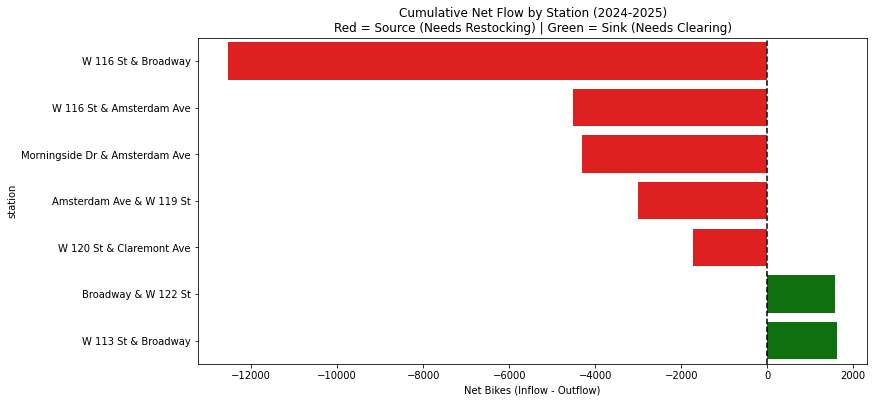

In [24]:
## Source vs. Sink Analysis
## Red bars indicate 'residential' or 'source' stations (e.g., dormitories) experiencing chronic bike shortages,
## while green bars represent 'academic' or 'destination' stations prone to capacity overflow.
station_stats = hourly_df.groupby("station")[["inflow", "outflow", "net_flow"]].sum().sort_values("net_flow")

plt.figure(figsize=(12, 6))
colors = ['red' if x < 0 else 'green' for x in station_stats['net_flow']]
sns.barplot(x=station_stats['net_flow'], y=station_stats.index, palette=colors)
plt.title("Cumulative Net Flow by Station (2024-2025)\nRed = Source (Needs Restocking) | Green = Sink (Needs Clearing)")
plt.xlabel("Net Bikes (Inflow - Outflow)")
plt.axvline(0, color='black', linestyle='--')
plt.show()

Now lets extract extra features that will help the algorithm decode behavior

In [25]:
# Extract hour of day (0-23)
hourly_df["hour_of_day"] = hourly_df["hour"].dt.hour

# Year
hourly_df["year"] = hourly_df["hour"].dt.year

# Month
hourly_df["month"] = hourly_df["hour"].dt.month

# Weekday (0 = Monday, 6 = Sunday)
hourly_df["weekday"] = hourly_df["hour"].dt.weekday

# Weekend flag
hourly_df["is_weekend"] = hourly_df["weekday"].isin([5, 6]).astype(int)

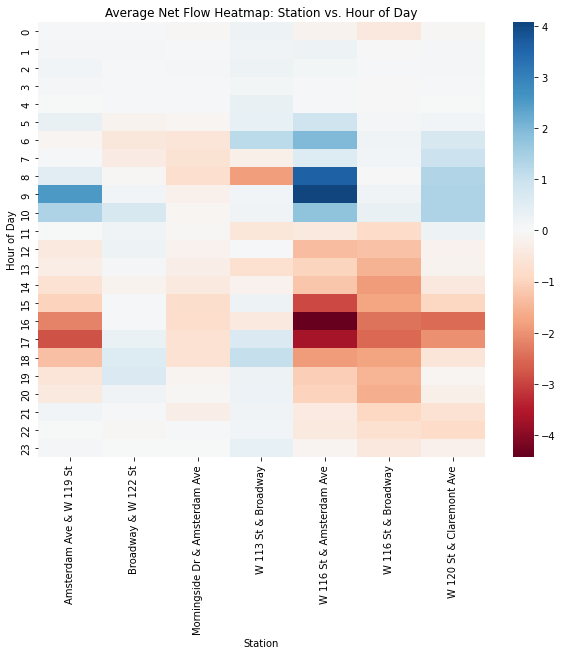

In [26]:
## Hourly Rebalancing Heatmap
## bule: peak of inflow
## red: peak of outflow
pivot_net_flow = hourly_df.groupby(["station", "hour_of_day"])["net_flow"].mean().unstack(level=0)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_net_flow, cmap="RdBu", center=0, annot=False)
plt.title("Average Net Flow Heatmap: Station vs. Hour of Day")
plt.ylabel("Hour of Day")
plt.xlabel("Station")
plt.show()

In [27]:
#Lets also add a holiday flag
import holidays

years_in_data = sorted(hourly_df["year"].unique())
us_holidays = holidays.US(years=years_in_data)

hourly_df["is_holiday"] = hourly_df["hour"].dt.date.map(
    lambda d: d in us_holidays
).astype(int)

In [28]:
#Sanity check
hourly_df[hourly_df["is_holiday"] == 1].sample(3)

,station,hour,outflow,inflow,net_flow,total_volume,hour_of_day,year,month,weekday,is_weekend,is_holiday
90335,W 116 St & Broadway,2025-02-17 23:00:00,1.0,0.0,-1.0,1.0,23,2025,2,0,0,1
95022,W 116 St & Broadway,2025-09-01 06:00:00,0.0,1.0,1.0,1.0,6,2025,9,0,0,1
45362,Morningside Dr & Amsterdam Ave,2025-07-04 02:00:00,0.0,0.0,0.0,0.0,2,2025,7,4,0,1


Holidays see a 83.8% drop in ridership compared to regular days.


/var/folders/mp/krm2l_md3rg7ymrqgfg4stsr0000gn/T/ipykernel_10878/1316281390.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_holiday", y="total_volume", data=daily_volume, palette="Set2", showfliers=False)


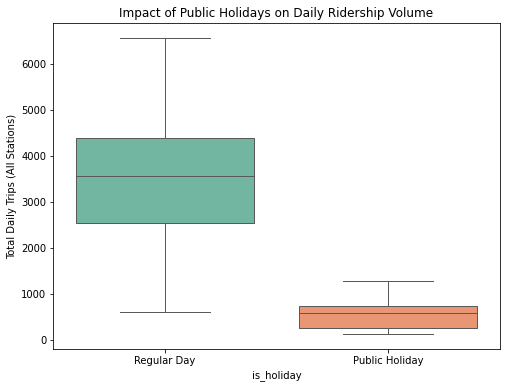

In [53]:
plt.figure(figsize=(8, 6))

# Compare average daily total traffic on holidays vs. weekdays
# We need to aggregate by day first, because the hourly distribution may differ.
daily_volume = hourly_df.groupby(["year", "month", "weekday", "is_holiday"])["total_volume"].sum().reset_index()

sns.boxplot(x="is_holiday", y="total_volume", data=daily_volume, palette="Set2", showfliers=False)
plt.xticks([0, 1], ["Regular Day", "Public Holiday"])
plt.title("Impact of Public Holidays on Daily Ridership Volume")
plt.ylabel("Total Daily Trips (All Stations)")

# Calculate the specific decline range
avg_vol = daily_volume.groupby("is_holiday")["total_volume"].mean()
drop_pct = (1 - avg_vol[1] / avg_vol[0]) * 100
print(f"Holidays see a {drop_pct:.1f}% drop in ridership compared to regular days.")

plt.show()

Since we are gonna treat this as a timeseries problem now we are gonna extract lag_features

In [29]:
#Data are already sorted but lets make sure
hourly_df = hourly_df.sort_values(["station", "hour"]).reset_index(drop=True)

We are not gonna use short-term lags since we have decided that we are gonna a next-day forecast, so will use data up to day D to predict day D+1

In [30]:
# Add simple lag features
#Previous day same hour
hourly_df["inflow_lag_24"] = hourly_df.groupby("station")["inflow"].shift(24) #careful not to shift station to another station effect so we groupby station as well
hourly_df["outflow_lag_24"] = hourly_df.groupby("station")["outflow"].shift(24)

#Previous week same hour
hourly_df["inflow_lag_168"] = hourly_df.groupby("station")["inflow"].shift(168)
hourly_df["outflow_lag_168"] = hourly_df.groupby("station")["outflow"].shift(168)

In [31]:
#Sanity check
hourly_df[hourly_df["station"] == "W 120 St & Claremont Ave"].head(30)

,station,hour,outflow,inflow,net_flow,total_volume,hour_of_day,year,month,weekday,is_weekend,is_holiday,inflow_lag_24,outflow_lag_24,inflow_lag_168,outflow_lag_168
96480,W 120 St & Claremont Ave,2024-01-01 00:00:00,1.0,4.0,3.0,5.0,0,2024,1,0,0,1,NaN,NaN,NaN,NaN
96481,W 120 St & Claremont Ave,2024-01-01 01:00:00,0.0,0.0,0.0,0.0,1,2024,1,0,0,1,NaN,NaN,NaN,NaN
96482,W 120 St & Claremont Ave,2024-01-01 02:00:00,1.0,0.0,-1.0,1.0,2,2024,1,0,0,1,NaN,NaN,NaN,NaN
96483,W 120 St & Claremont Ave,2024-01-01 03:00:00,0.0,0.0,0.0,0.0,3,2024,1,0,0,1,NaN,NaN,NaN,NaN
96484,W 120 St & Claremont Ave,2024-01-01 04:00:00,0.0,1.0,1.0,1.0,4,2024,1,0,0,1,NaN,NaN,NaN,NaN
96485,W 120 St & Claremont Ave,2024-01-01 05:00:00,0.0,0.0,0.0,0.0,5,2024,1,0,0,1,NaN,NaN,NaN,NaN
96486,W 120 St & Claremont Ave,2024-01-01 06:00:00,0.0,0.0,0.0,0.0,6,2024,1,0,0,1,NaN,NaN,NaN,NaN
96487,W 120 St & Claremont Ave,2024-01-01 07:00:00,0.0,0.0,0.0,0.0,7,2024,1,0,0,1,NaN,NaN,NaN,NaN
96488,W 120 St & Claremont Ave,2024-01-01 08:00:00,0.0,0.0,0.0,0.0,8,2024,1,0,0,1,NaN,NaN,NaN,NaN
96489,W 120 St & Claremont Ave,2024-01-01 09:00:00,1.0,0.0,-1.0,1.0,9,2024,1,0,0,1,NaN,NaN,NaN,NaN


In [32]:
#Now lets drop the nans
hourly_df = hourly_df.dropna().reset_index(drop=True)

In [33]:
#All good so far
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111384 entries, 0 to 111383
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   station          111384 non-null  object        
 1   hour             111384 non-null  datetime64[ns]
 2   outflow          111384 non-null  float64       
 3   inflow           111384 non-null  float64       
 4   net_flow         111384 non-null  float64       
 5   total_volume     111384 non-null  float64       
 6   hour_of_day      111384 non-null  int32         
 7   year             111384 non-null  int32         
 8   month            111384 non-null  int32         
 9   weekday          111384 non-null  int32         
 10  is_weekend       111384 non-null  int64         
 11  is_holiday       111384 non-null  int64         
 12  inflow_lag_24    111384 non-null  float64       
 13  outflow_lag_24   111384 non-null  float64       
 14  inflow_lag_168   111

Now lets encode the station ID Models don't understand human text.
They need something numerical to differentiate which station each row belongs to.

In [34]:
# Encode station as category → integer
hourly_df["station_id"] = hourly_df["station"].astype("category").cat.codes

In [35]:
#This is our mapping
hourly_df[["station", "station_id"]].drop_duplicates().sort_values("station_id")

,station,station_id
0,Amsterdam Ave & W 119 St,0
15912,Broadway & W 122 St,1
31824,Morningside Dr & Amsterdam Ave,2
47736,W 113 St & Broadway,3
63648,W 116 St & Amsterdam Ave,4
79560,W 116 St & Broadway,5
95472,W 120 St & Claremont Ave,6


In [36]:
hourly_df

,station,hour,outflow,inflow,net_flow,total_volume,hour_of_day,year,month,weekday,is_weekend,is_holiday,inflow_lag_24,outflow_lag_24,inflow_lag_168,outflow_lag_168,station_id
0,Amsterdam Ave & W 119 St,2024-01-08 00:00:00,0.0,0.0,0.0,0.0,0,2024,1,0,0,0,1.0,0.0,0.0,0.0,0
1,Amsterdam Ave & W 119 St,2024-01-08 01:00:00,0.0,0.0,0.0,0.0,1,2024,1,0,0,0,0.0,0.0,0.0,0.0,0
2,Amsterdam Ave & W 119 St,2024-01-08 02:00:00,0.0,0.0,0.0,0.0,2,2024,1,0,0,0,0.0,0.0,0.0,0.0,0
3,Amsterdam Ave & W 119 St,2024-01-08 03:00:00,0.0,0.0,0.0,0.0,3,2024,1,0,0,0,0.0,0.0,0.0,0.0,0
4,Amsterdam Ave & W 119 St,2024-01-08 04:00:00,0.0,0.0,0.0,0.0,4,2024,1,0,0,0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111379,W 120 St & Claremont Ave,2025-10-31 19:00:00,3.0,0.0,-3.0,3.0,19,2025,10,4,0,0,1.0,5.0,0.0,3.0,6
111380,W 120 St & Claremont Ave,2025-10-31 20:00:00,1.0,0.0,-1.0,1.0,20,2025,10,4,0,0,0.0,4.0,1.0,1.0,6
111381,W 120 St & Claremont Ave,2025-10-31 21:00:00,2.0,0.0,-2.0,2.0,21,2025,10,4,0,0,0.0,7.0,0.0,1.0,6
111382,W 120 St & Claremont Ave,2025-10-31 22:00:00,1.0,0.0,-1.0,1.0,22,2025,10,4,0,0,0.0,4.0,0.0,2.0,6


Now lets add our weather data

In [37]:
data_path = os.path.join('.', 'openmeteo_cu_hourly_2024_01_to_2025_10_from_client.csv')
weather_df = pd.read_csv(data_path)

weather_df

,time,temperature_2m,wind_speed_10m,precipitation,snowfall,snow_depth
0,2024-01-01 05:00:00+00:00,2.331000,9.021574,0.0,0.0,0.0
1,2024-01-01 06:00:00+00:00,2.931000,10.883676,0.0,0.0,0.0
2,2024-01-01 07:00:00+00:00,2.981000,10.086427,0.0,0.0,0.0
3,2024-01-01 08:00:00+00:00,2.731000,8.089993,0.0,0.0,0.0
4,2024-01-01 09:00:00+00:00,0.531000,5.588703,0.0,0.0,0.0
...,...,...,...,...,...,...
16075,2025-11-01 00:00:00+00:00,11.631001,22.732082,0.0,0.0,0.0
16076,2025-11-01 01:00:00+00:00,11.381001,23.857979,0.0,0.0,0.0
16077,2025-11-01 02:00:00+00:00,10.831000,19.875946,0.0,0.0,0.0
16078,2025-11-01 03:00:00+00:00,10.281000,18.852798,0.0,0.0,0.0


In [38]:
weather_df["time"] = pd.to_datetime(weather_df["time"], utc=True) #make sure we have correct timezone
weather_df["time"] = weather_df["time"].dt.tz_convert(None)   # remove timezone

In [39]:
weather_df = weather_df.rename(columns={"time": "hour"})

Now we want to know “For every hour in hourly_df, does weather_df contain that hour?”

In [40]:
#We don’t keep the result yet just testing for now
test_merge = hourly_df.merge(
    weather_df,
    on="hour",
    how="left"
)
missing_count = test_merge["temperature_2m"].isna().sum()
missing_count

0

Perfect, so we got all data

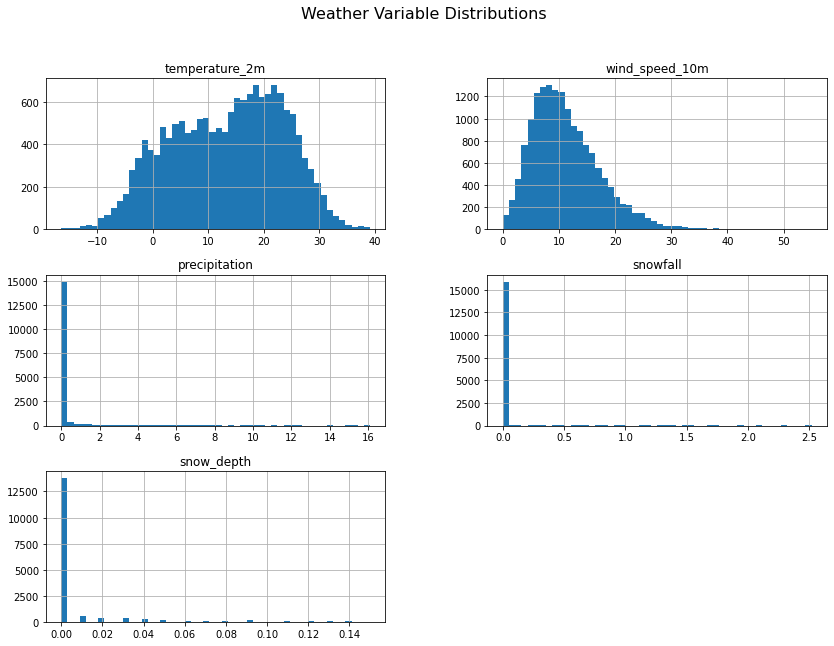

In [41]:
#Lets analyze the weather data a bit
import matplotlib.pyplot as plt

weather_cols = ["temperature_2m", "wind_speed_10m", "precipitation", "snowfall", "snow_depth"]

weather_df[weather_cols].hist(bins=50, figsize=(14, 10))
plt.suptitle("Weather Variable Distributions", fontsize=16)
plt.show()

Temp and wind speed distributions look good and as expected, but lets dig deeper into the other 3 varibales

In [42]:
# Define bins
precip_bins = [0, 0.00001, 1, 5, 100]
precip_labels = ["0 (Dry)", "0–1 (Light)", "1–5 (Moderate)", ">5 (Heavy)"]

snow_bins = [0, 0.00001, 0.2, 1, 100]
snow_labels = ["0 (No Snow)", "0–0.2 (Light)", "0.2–1 (Moderate)", ">1 (Heavy)"]

# Categorize WITHOUT storing the results in the dataframe
precip_cat = pd.cut(weather_df["precipitation"], bins=precip_bins, labels=precip_labels, right=False)
snow_cat = pd.cut(weather_df["snowfall"], bins=snow_bins, labels=snow_labels, right=False)

# Compute percentages
precip_pct = precip_cat.value_counts(normalize=True) * 100
snow_pct = snow_cat.value_counts(normalize=True) * 100

precip_pct

precipitation
0 (Dry)           85.410448
0–1 (Light)       10.764925
1–5 (Moderate)     3.314677
>5 (Heavy)         0.509950
Name: proportion, dtype: float64

In [43]:
snow_pct

snowfall
0 (No Snow)         98.731343
0–0.2 (Light)        0.609453
0.2–1 (Moderate)     0.541045
>1 (Heavy)           0.118159
Name: proportion, dtype: float64

The stats match the official NOAA values. Real NYC climatology:
NYC has ~120 rainy days per year,
but only ~10 percent of hours have measurable precipitation.

There is probably collinearity between snowfall and snow_depth so we will drop one

In [44]:
weather_df = weather_df.drop(columns=["snow_depth"], errors="ignore")

So lets merge again

In [45]:
#This duplicates weather rows for each station
hourly_df = hourly_df.merge(
    weather_df,
    on="hour",
    how="left"
)

In [46]:
hourly_df

,station,hour,outflow,inflow,net_flow,total_volume,hour_of_day,year,month,weekday,...,is_holiday,inflow_lag_24,outflow_lag_24,inflow_lag_168,outflow_lag_168,station_id,temperature_2m,wind_speed_10m,precipitation,snowfall
0,Amsterdam Ave & W 119 St,2024-01-08 00:00:00,0.0,0.0,0.0,0.0,0,2024,1,0,...,0,1.0,0.0,0.0,0.0,0,0.031000,10.383987,0.0,0.0
1,Amsterdam Ave & W 119 St,2024-01-08 01:00:00,0.0,0.0,0.0,0.0,1,2024,1,0,...,0,0.0,0.0,0.0,0.0,0,-0.069000,13.089354,0.0,0.0
2,Amsterdam Ave & W 119 St,2024-01-08 02:00:00,0.0,0.0,0.0,0.0,2,2024,1,0,...,0,0.0,0.0,0.0,0.0,0,0.331000,18.089775,0.0,0.0
3,Amsterdam Ave & W 119 St,2024-01-08 03:00:00,0.0,0.0,0.0,0.0,3,2024,1,0,...,0,0.0,0.0,0.0,0.0,0,0.231000,17.577440,0.0,0.0
4,Amsterdam Ave & W 119 St,2024-01-08 04:00:00,0.0,0.0,0.0,0.0,4,2024,1,0,...,0,0.0,0.0,0.0,0.0,0,-0.219000,14.400000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111379,W 120 St & Claremont Ave,2025-10-31 19:00:00,3.0,0.0,-3.0,3.0,19,2025,10,4,...,0,1.0,5.0,0.0,3.0,6,13.131001,25.770820,0.0,0.0
111380,W 120 St & Claremont Ave,2025-10-31 20:00:00,1.0,0.0,-1.0,1.0,20,2025,10,4,...,0,0.0,4.0,1.0,1.0,6,12.931001,26.550457,0.0,0.0
111381,W 120 St & Claremont Ave,2025-10-31 21:00:00,2.0,0.0,-2.0,2.0,21,2025,10,4,...,0,0.0,7.0,0.0,1.0,6,12.031000,28.445126,0.0,0.0
111382,W 120 St & Claremont Ave,2025-10-31 22:00:00,1.0,0.0,-1.0,1.0,22,2025,10,4,...,0,0.0,4.0,0.0,2.0,6,11.481000,21.886845,0.0,0.0


Our data is ready for model deployment lets save it to our data folder

In [47]:
# Save final dataframe to CSV
hourly_df.to_csv(".citibike_columbia_model_ready.csv", index=False)

/var/folders/mp/krm2l_md3rg7ymrqgfg4stsr0000gn/T/ipykernel_10878/3139168875.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_effect = hourly_df.groupby('temp_bin')['outflow'].mean()


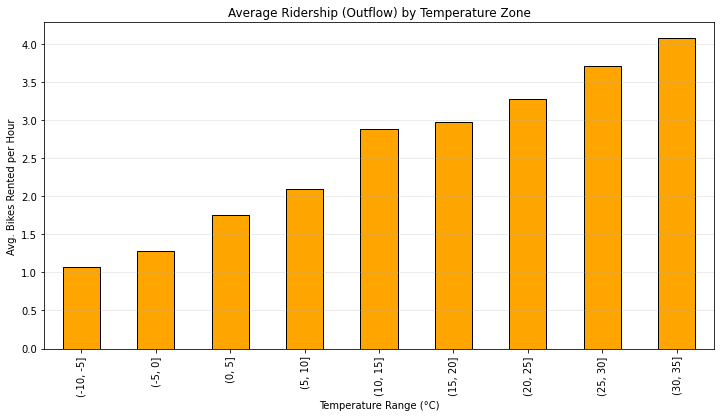

In [48]:
# Create 5°C bins for temperature to see the trend clearly
hourly_df['temp_bin'] = pd.cut(hourly_df['temperature_2m'], bins=range(-10, 40, 5))

plt.figure(figsize=(12, 6))
# Calculate the average outflow rate for each temperature range.
temp_effect = hourly_df.groupby('temp_bin')['outflow'].mean()
temp_effect.plot(kind='bar', color='orange', edgecolor='black')

plt.title("Average Ridership (Outflow) by Temperature Zone")
plt.xlabel("Temperature Range (°C)")
plt.ylabel("Avg. Bikes Rented per Hour")
plt.grid(axis='y', alpha=0.3)
plt.show()

In [49]:
## Check the sample size (in hours) for each temperature range.
print(hourly_df.groupby('temp_bin')['outflow'].count())

temp_bin
(-10, -5]     2723
(-5, 0]       9884
(0, 5]       13265
(5, 10]      15351
(10, 15]     15596
(15, 20]     19922
(20, 25]     19705
(25, 30]     11319
(30, 35]      2821
Name: outflow, dtype: int64


/var/folders/mp/krm2l_md3rg7ymrqgfg4stsr0000gn/T/ipykernel_10878/2071403983.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(hourly_df.groupby('temp_bin')['outflow'].count())


/var/folders/mp/krm2l_md3rg7ymrqgfg4stsr0000gn/T/ipykernel_10878/2351669071.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rain_category', y='outflow', data=hourly_df, showfliers=False, palette="Blues")


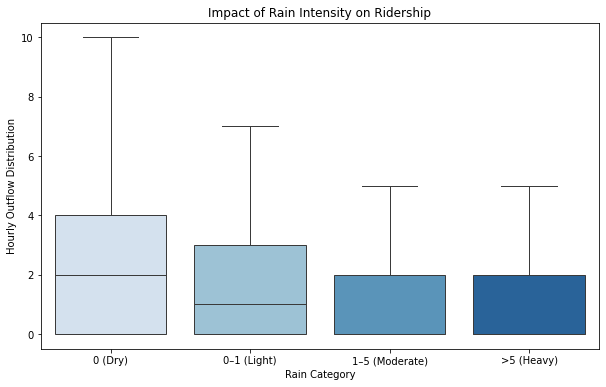

Ridership Drop Rate compared to Dry days:
rain_category
0 (Dry)            0.000000
0–1 (Light)       19.354445
1–5 (Moderate)    46.574742
>5 (Heavy)        48.214261
Name: outflow, dtype: float64


/var/folders/mp/krm2l_md3rg7ymrqgfg4stsr0000gn/T/ipykernel_10878/2351669071.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_outflow_by_rain = hourly_df.groupby('rain_category')['outflow'].mean()


In [50]:
hourly_df['rain_category'] = pd.cut(hourly_df['precipitation'], 
                                    bins=precip_bins, 
                                    labels=precip_labels, 
                                    right=False)

# Draw a box plot to observe the distribution changes (remove outliers to make the median clearer).
plt.figure(figsize=(10, 6))
sns.boxplot(x='rain_category', y='outflow', data=hourly_df, showfliers=False, palette="Blues")
plt.title("Impact of Rain Intensity on Ridership")
plt.xlabel("Rain Category")
plt.ylabel("Hourly Outflow Distribution")
plt.show()

# Calculate the specific percentage decrease
avg_outflow_by_rain = hourly_df.groupby('rain_category')['outflow'].mean()
drop_rate = (1 - avg_outflow_by_rain / avg_outflow_by_rain.iloc[0]) * 100
print("Ridership Drop Rate compared to Dry days:")
print(drop_rate)

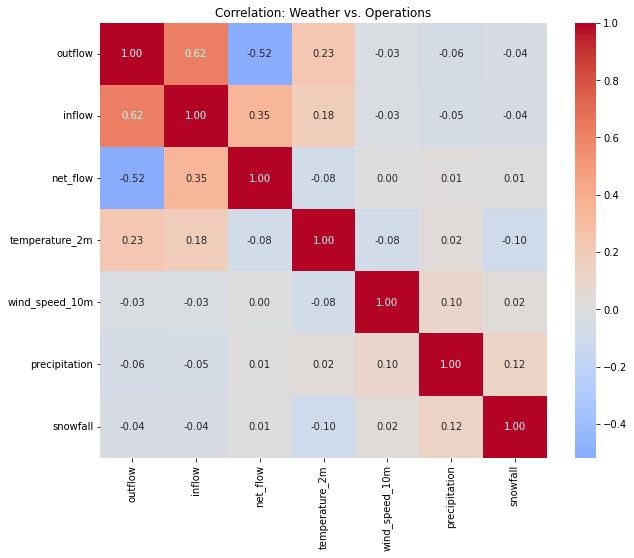

In [51]:
# Selecting weather features and business features
corr_cols = [
    'outflow', 'inflow', 'net_flow', 
    'temperature_2m', 'wind_speed_10m', 'precipitation', 'snowfall'
]

plt.figure(figsize=(10, 8))

# Calculate the correlation coefficient
correlation = hourly_df[corr_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Correlation: Weather vs. Operations")
plt.show()

<Figure size 864x432 with 0 Axes>

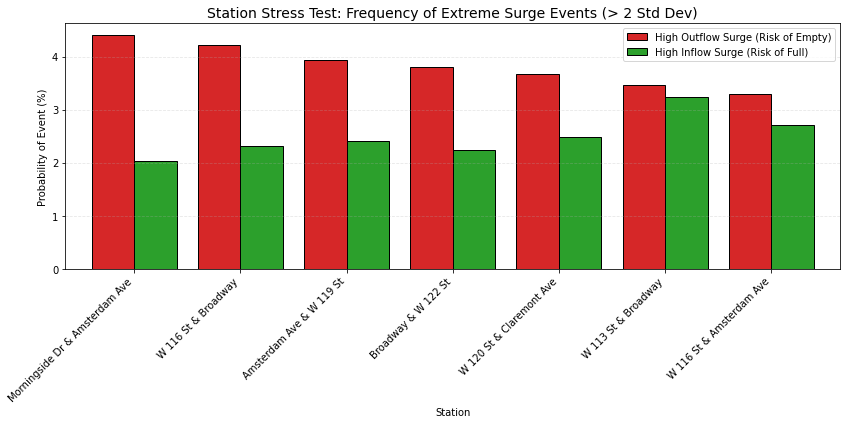

Operational Thresholds (2 Std Dev) by Station:
------------------------------------------------------------
Amsterdam Ave & W 119 St:
   Normal Net Flow Range: [-5.7, 5.3]
   ALERT IF: Net Outflow > 5.7 bikes OR Net Inflow > 5.3 bikes
------------------------------------------------------------
Broadway & W 122 St:
   Normal Net Flow Range: [-3.9, 4.1]
   ALERT IF: Net Outflow > 3.9 bikes OR Net Inflow > 4.1 bikes
------------------------------------------------------------
Morningside Dr & Amsterdam Ave:
   Normal Net Flow Range: [-3.8, 3.3]
   ALERT IF: Net Outflow > 3.8 bikes OR Net Inflow > 3.3 bikes
------------------------------------------------------------
W 113 St & Broadway:
   Normal Net Flow Range: [-5.6, 5.8]
   ALERT IF: Net Outflow > 5.6 bikes OR Net Inflow > 5.8 bikes
------------------------------------------------------------
W 116 St & Amsterdam Ave:
   Normal Net Flow Range: [-8.1, 7.6]
   ALERT IF: Net Outflow > 8.1 bikes OR Net Inflow > 7.6 bikes
-----------------

In [55]:
# 1. Calculate Mean and Standard Deviation of Net Flow for each station
# Since traffic baselines vary by station, we must calculate stats individually.
station_stats = hourly_df.groupby("station")["net_flow"].agg(["mean", "std"]).reset_index()
station_stats.rename(columns={"mean": "station_mean", "std": "station_std"}, inplace=True)

# 2. Merge station statistics back into the main dataframe
hourly_df_stress = hourly_df.merge(station_stats, on="station", how="left")

# 3. Calculate Z-Score
# Formula: Z = (Current Net Flow - Station Mean) / Station Std Dev
# A Z-score > 2 means the current flow deviates more than 2 standard deviations from the norm.
hourly_df_stress["z_score"] = (hourly_df_stress["net_flow"] - hourly_df_stress["station_mean"]) / hourly_df_stress["station_std"]

# 4. Define Surge Events based on Z-Score Thresholds
# High Outflow Risk (Risk of Empty Station): Z-Score < -2 (Significantly higher outflow than usual)
# High Inflow Risk (Risk of Full Station): Z-Score > 2 (Significantly higher inflow than usual)
hourly_df_stress["is_high_outflow"] = (hourly_df_stress["z_score"] < -2).astype(int)
hourly_df_stress["is_high_inflow"]  = (hourly_df_stress["z_score"] > 2).astype(int)

# 5. Calculate the frequency (probability) of these surge events
surge_frequency = hourly_df_stress.groupby("station")[["is_high_outflow", "is_high_inflow"]].mean() * 100

# 6. Visualization
plt.figure(figsize=(12, 6))
surge_frequency.sort_values("is_high_outflow", ascending=False).plot(
    kind="bar",
    color=["tab:red", "tab:green"],
    edgecolor="black",
    width=0.8,
    figsize=(12, 6)
)

plt.title("Station Stress Test: Frequency of Extreme Surge Events (> 2 Std Dev)", fontsize=14)
plt.ylabel("Probability of Event (%)")
plt.xlabel("Station")
plt.legend(["High Outflow Surge (Risk of Empty)", "High Inflow Surge (Risk of Full)"])
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 7. Print specific anomaly thresholds for operational context
print("Operational Thresholds (2 Std Dev) by Station:")
print("-" * 60)
for index, row in station_stats.iterrows():
    lower_limit = row['station_mean'] - 2 * row['station_std']
    upper_limit = row['station_mean'] + 2 * row['station_std']
    
    print(f"{row['station']}:")
    print(f"   Normal Net Flow Range: [{lower_limit:.1f}, {upper_limit:.1f}]")
    # Use abs() for easier readability of outflow
    print(f"   ALERT IF: Net Outflow > {abs(lower_limit):.1f} bikes OR Net Inflow > {upper_limit:.1f} bikes")
    print("-" * 60)

Our EDA is done here!